# V.1 Exploring the green reds

## a) Write a function that will plot a scatterplot matrix of your red wine data.

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_scatter_matrix(winedata, good_threshold, bad_threshold, save_plot=False):
    c = winedata.columns
    fig, axes = plt.subplots(len(c) - 1, len(c) - 1, figsize=(15, 15))
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, wspace=0, hspace=0)
    for i in range(len(c) - 1):
        for j in range(len(c) - 1):
            ax = axes[i, j]
            p = patches.Rectangle((0, 0), 1, 1, fill=True, transform=ax.transAxes,
                clip_on=False, facecolor='w', zorder=0.1, edgecolor='#000000')
            ax.add_patch(p)
            if (i != j):
                y1 = winedata[winedata['quality'] < bad_threshold][c[i]]
                x1 = winedata[winedata['quality'] < bad_threshold][c[j]]
                y2 = winedata[winedata['quality'] > good_threshold][c[i]]
                x2 = winedata[winedata['quality'] > good_threshold][c[j]]
                min = x1.min()
                if (min > x2.min()):
                    min = x2.min()
                max = x1.max()
                if (max < x2.max()):
                    max = x2.max()
                ax.set_xlim(left=min*0.95, right=max*1.05)
                min = y1.min()
                if (min > y2.min()):
                    min = y2.min()
                max = y1.max()
                if (max < y2.max()):
                    max = y2.max()
                ax.set_ylim(bottom=min*0.95, top=max*1.05)
                ax.scatter(x1, y1, marker='.', s=20, linewidths=0, c='#EC008C')
                ax.scatter(x2, y2, marker='.', s=20, linewidths=0, c='#009E49')
            else:
                ax.text(0.5, 0.5, c[i].replace(' ', '\n'), horizontalalignment='center', verticalalignment='center',
                    transform=ax.transAxes, fontsize='x-large')
            ax.set_axis_off()
    
    if (save_plot == False):
        plt.show()
    else:
       fig.savefig("./matrix.png")


## b) Analyze different chemical factors in red wines 

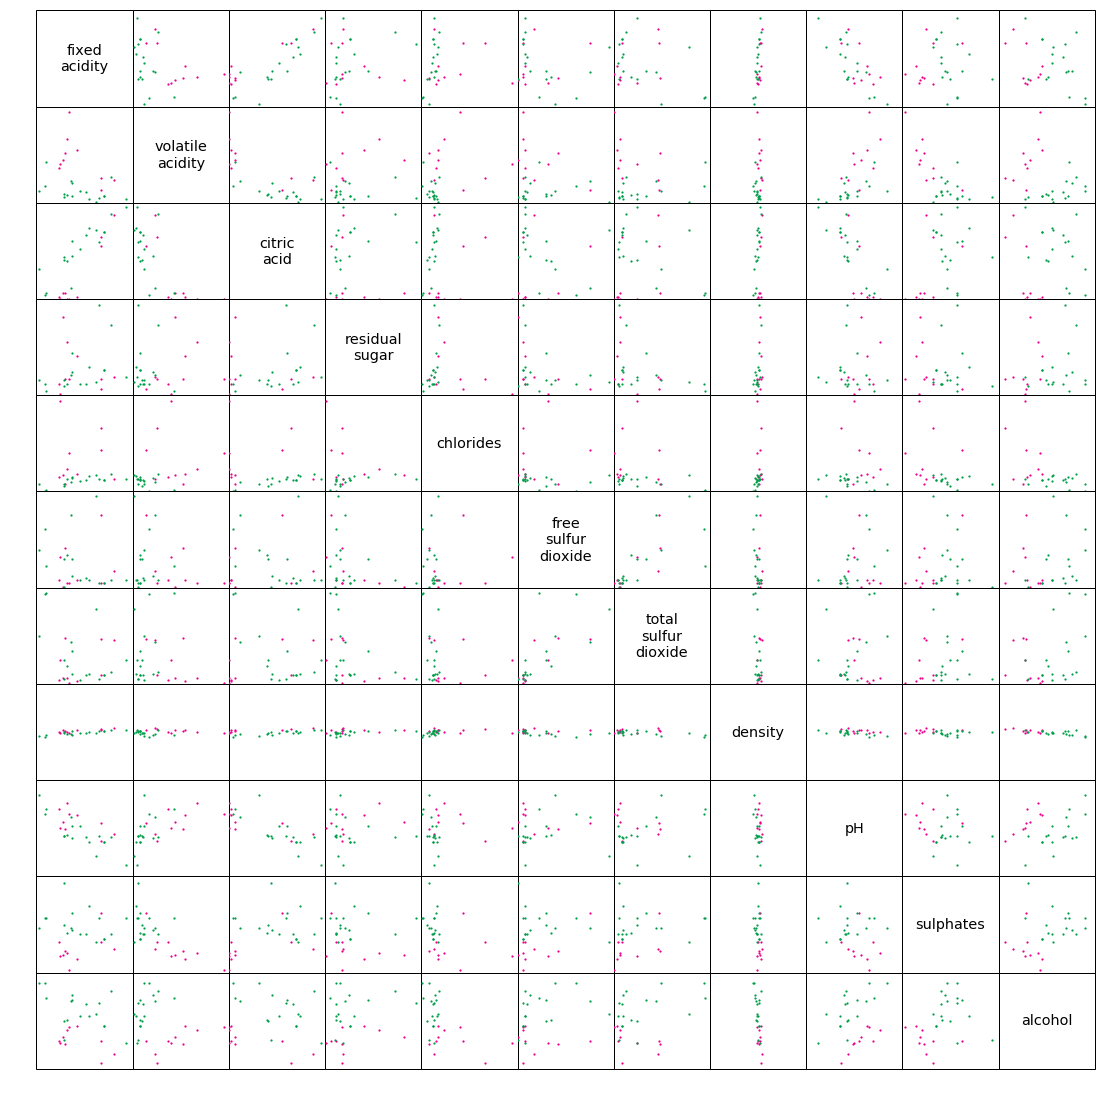

In [20]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=";")

plot_scatter_matrix(df, 7, 4, False)

pH and alcohol is most useful to split wines by quality, because they perfectly visualy divided on two different zones.

# V.2 Learning to perceptron

## a) Implement a perceptron b) Implement a function to train your perceptron

In [21]:
import random
random.seed(24679)

def inf_generator():
    i = 0
    while True:
        yield i
        i += 1

In [22]:
class Perceptron(object):
    """
    Perceptron with Rosenblatt perceptron learning rule and Heaviside step activation function
    """
    
    def __init__(self, inputs_count):
        self.w = [random.random()] * inputs_count
        self.bias = random.random()
        
    def predict(self, row):
        """
        Predict function of perceptron
            @row - array of input values
            
            @return a result of 0 and 1, where 1 - wine is good, 0 - wine is bad
        """
        result = 0.0
        for i in range(len(self.w)):
            result += self.w[i] * row[i]
        result += self.bias
        return (1 if result >= 0.0 else 0)

    def learn(self, data, target, epochs_count = 0, eta = 0.01):
        """
        Learn function for training perceptron
            @data - samples
            @target - target values
            @epochs_count - number of training epochs
            @eta - learning rate (between 0.0 and 1.0)
            
            @return a list of (current_epoch, num_errors_at_epoch_end, [array_of_weights], bias)
        """
        result = []
        for i in inf_generator() if epochs_count == 0 else range(epochs_count):
            errors = 0
            for d, t in zip(data, target):
                value = eta * (t - self.predict(d))
                self.w += value * d
                self.bias += value
                errors += int(value != 0.0)
            tpl = (i, errors, self.w, self.bias)
            result.append(tpl);
            if (epochs_count == 0 and errors == 0):
                break
        return result
    
       

In [23]:
good = 7
bad = 4

import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=";")

data = df.loc[(df['quality'] > good) | (df['quality'] < bad),['pH', 'alcohol', 'quality']]
quality = data['quality']
quality = quality.apply(lambda x: (1 if x > good else 0))

perceptron = Perceptron(2)
a = perceptron.learn(data.loc[:, ['pH', 'alcohol']].values, quality.values)


## c) Write a function that will take the output of your perceptron training function and your red wine data and generate two plots in one figure

In [24]:
import matplotlib.pyplot as plt

def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    """
    Plot the perfomance of our perceptron or adaline.
    This function will produce a two plot fugure:
    1) Classification Errors vs Epochs
    2) Decisions boundary for two factors
    """
    errors = []
    for tpl in performance:
        errors.append(tpl[1])
    tpl = performance[epoch] if epoch != -1 else performance[len(performance) - 1]
    fig, axes = plt.subplots(1, 2, figsize=(15, 4), facecolor='w')
    ax = axes[0]
    ax.set_title("Errors as a function of epoch")
    ax.set_xlabel("epoch")
    ax.set_ylabel("classification errors")
    ax.plot(range(performance[len(performance) - 1][0]), errors[1:])
    ax.tick_params(direction='out', right=False, top=False)
    ax = axes[1]
    ax.set_title('Decision boundary on epoch: {}'.format(tpl[0]))
    ax.set_ylabel(wine_data.columns[0])
    ax.set_xlabel(wine_data.columns[1])
    y1 = wine_data[wine_data['quality'] < bad_thresh][wine_data.columns[0]]
    x1 = wine_data[wine_data['quality'] < bad_thresh][wine_data.columns[1]]
    y2 = wine_data[wine_data['quality'] > good_thresh][wine_data.columns[0]]
    x2 = wine_data[wine_data['quality'] > good_thresh][wine_data.columns[1]]
    min_x = x1.min()
    if (min_x > x2.min()):
        min_x = x2.min()
    max_x = x1.max()
    if (max_x < x2.max()):
        max_x = x2.max()
    ax.set_xlim(left=min_x*0.95, right=max_x*1.05)
    min_y = y1.min()
    if (min_y > y2.min()):
        min_y = y2.min()
    max_y = y1.max()
    if (max_y < y2.max()):
        max_y = y2.max()
    ax.set_ylim(bottom=min_y*0.95, top=max_y*1.05)
    
    a = -(tpl[3]/tpl[2][0])/(tpl[3]/tpl[2][1])
    b = -tpl[3]/tpl[2][0]
    x = [0] * 2
    y = [0] * 2
    x[0] = min_x * 0.95
    y[0] = a * x[0] + b
    x[1] = max_x * 1.05
    y[1] = a * x[1] + b
    ax.plot(x, y, '--', label="Decision Boundary", alpha=0.8)
    ax.fill_between(x, y, max_y + 2, where=y<max_y + 2, facecolor='#EC008C', alpha=.15)
    ax.fill_between(x, y, min_y - 2, where=y>min_y - 2, facecolor='#009E49', alpha=.15)
    ax.scatter(x1, y1, marker='o', s=20, linewidths=0, c='#EC008C', label='bad wines (<{} score)'.format(bad_thresh))
    ax.scatter(x2, y2, marker='o', s=20, linewidths=0, c='#009E49', label='good wines (>{} score)'.format(good_thresh))
    ax.tick_params(direction='out', right=False, top=False)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', scatterpoints=1)
    plt.tight_layout()
    if (save_plot == False):
        plt.show()
    else:
       fig.savefig("./perfomance.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

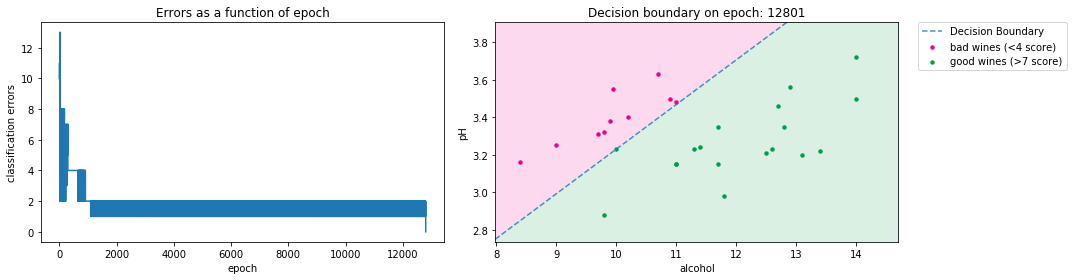

In [25]:
plot_performance(performance=a, wine_data=df.loc[:,['pH', 'alcohol', 'quality']], good_thresh=good, bad_thresh=bad)

## d) Feature Scaling

In [26]:
def mean(data):
    return (sum(data) / len(data))

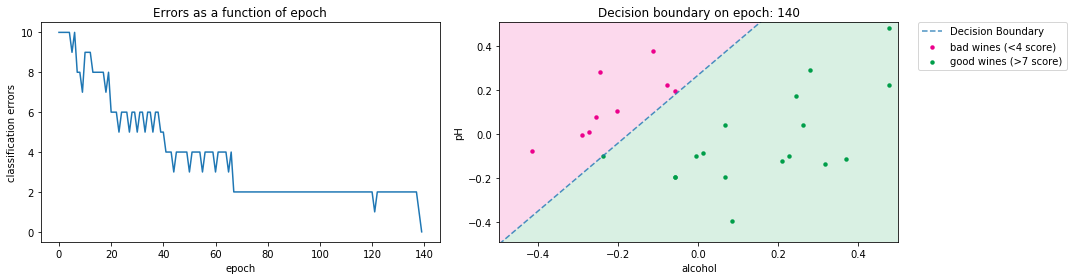

In [27]:
data_scaled = data.copy()
range_0 = data_scaled['pH'].max() - data_scaled['pH'].min()
range_1 = data_scaled['alcohol'].max() - data_scaled['alcohol'].min()
mean0 = mean(data_scaled['pH'])
mean1 = mean(data_scaled['alcohol'])
for i in range(len(data_scaled)):
    data_scaled['pH'].values[i] = (data_scaled['pH'].values[i] - mean0) / range_0
    data_scaled['alcohol'].values[i] = (data_scaled['alcohol'].values[i] - mean1) / range_1

perceptron_scaled = Perceptron(2)
b = perceptron_scaled.learn(data_scaled.loc[:, ['pH', 'alcohol']].values, quality.values)
plot_performance(performance=b, wine_data=data_scaled, good_thresh=good, bad_thresh=bad)

# V.3 My fair ADALINE

## a) Wines with a score of 4 and lower, and wines with a score of 7 and higher

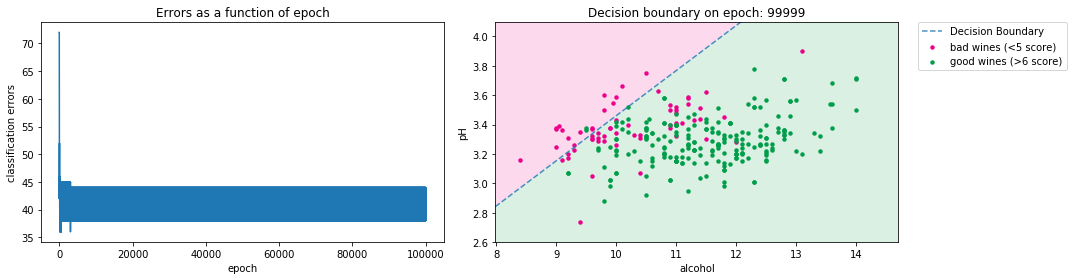

In [28]:
good2 = 6
bad2 = 5
data2 = df.loc[(df['quality'] > good2) | (df['quality'] < bad2),['pH', 'alcohol', 'quality']]
quality2 = data2['quality']
quality2 = quality2.apply(lambda x: (1 if x > good2 else 0))

perceptron = Perceptron(2)
a2 = perceptron.learn(data2.loc[:, ['pH', 'alcohol']].values, quality2.values, epochs_count=100000)
plot_performance(performance=a2, wine_data=data2, good_thresh=good2, bad_thresh=bad2)

Perceptron can't find right prediction, because result of prediction is discrete (0 or 1), so errors never equal 0. I try to test 100000 epochs (see the graph below)

## b) Implement an ADALINE  c) Implement a function to train your ADALINE

In [101]:
def l_plus(a, b):
    result = []
    for i in range(len(a)):
        res = a[i] + b[i]
        result.append(res)
    return result

def l_minus(a, b):
    result = []
    for i in range(len(a)):
        res = a[i] - b[i]
        result.append(res)
    return result

def l_plus_c(a, c):
    result = []
    for i in range(len(a)):
        res = a[i] + c
        result.append(res)
    return result

def l_T(a):
    result = []
    for j in range(len(a[0])):
        result.append([x[j] for x in a])
    return result

def make_2d(a):
    result = []
    for x in a:
        result.append([x])
    return result

def l_mult_c(a, c):
    result = []
    for x in a:
        y = 0;
        try:
            y = x[0]
        except TypeError:
            y = x
        result.append([y * c])
    return result

def l_dot(a, b):
    result = []
    try:
        len(a[0])
    except TypeError:
        a = make_2d(a)
    try:
        len(b[0])
    except TypeError:
        b = make_2d(b)
    for i in range(len(a)):
        res = []
        for j in range(len(b[0])):
            t = 0
            for x, y in zip(a[i], b):
                t += (x * y[j]) 
            res.append(t)
        result.append(res)
    return result


In [105]:
class Adaline(object):
    """
    ADALINE with Widrow-Hoff learning rule and linear activation function and some kind of quantizer
    """
    
    def __init__(self, inputs_count, seed):
        random.seed(seed)
        self.w = [random.random()] * inputs_count
        self.bias = random.random()
        
    def calc_input(self, data):
        result = []
        for row in data:
            res = 0
            for i in range(len(self.w)):
                res += self.w[i] * row[i]
            result.append(res)
        result = l_plus_c(result, self.bias)
        return result
        
    def predict(self, row):
        """
        Predict function of ADALINE
            @row - array of input values
            
            @return a result of 0 and 1, where 1 - wine is good, 0 - wine is bad
        """
        result = self.calc_input(row)[0]
        return (1 if result >= 0.0 else 0)

    def learn(self, data, target, epochs_count = 0, eta = 0.01, batch_size = 0):
        """
        Learn function for training ADALINE
            @data - samples
            @target - target values
            @epochs_count - number of training epochs
            @eta - learning rate (between 0.0 and 1.0)
            @batch_size - learning on data batch = size, if equals 0 - using all data
            
            @return a list of (current_epoch, num_errors_at_epoch_end, [array_of_weights], bias)
        """
        result = []
        if (batch_size == 0):
            X = data
            y = target
        else:
            X, y = zip(*(random.sample(list(zip(data, target)), batch_size)))
        for i in inf_generator() if epochs_count == 0 else range(epochs_count):
            d = self.calc_input(X)
            errors = l_plus(y, d)
            self.w += l_mult_c(l_dot(l_T(X), errors), eta)
            bias = eta * sum(errors)
            cost = sum(x * x for x in errors) / 2.0
            tpl = (i, errors, self.w, self.bias, cost)
            result.append(tpl);
            if (epochs_count == 0 and (i > 1 and abs(ret[i - 1][4]) < abs(tpl[4]))):
                break
        return result
